# A study on the comparison of Machine Learning classifiers with Diabetes dataset

In this notebook, we use different Machine Learning classification algorithms and compare their performance.

In [35]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [1]:
from pandas import read_csv
from matplotlib import pyplot

Next we import some Machine Learning algorithms from Sklearn library.

In [3]:
from sklearn.neighbors import KNeighborsClassifier #K-nearest neighbors
from sklearn.linear_model import LogisticRegression #Logistic regression
from sklearn.naive_bayes import GaussianNB #Naive Bayes Gaussian
from sklearn.svm import SVC #Support Vector Machine
from sklearn.tree import DecisionTreeClassifier #Decision Tree classifier

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [32]:
import numpy as np

Let's import the dataset

In [8]:
filename = 'pima-indians-diabetes.csv'
dataframe = read_csv(filename)

In [9]:
print(dataframe)

      6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
5     3   78  50  32   88  31.0  0.248  26  1
6    10  115   0   0    0  35.3  0.134  29  0
7     2  197  70  45  543  30.5  0.158  53  1
8     8  125  96   0    0   0.0  0.232  54  1
9     4  110  92   0    0  37.6  0.191  30  0
10   10  168  74   0    0  38.0  0.537  34  1
11   10  139  80   0    0  27.1  1.441  57  0
12    1  189  60  23  846  30.1  0.398  59  1
13    5  166  72  19  175  25.8  0.587  51  1
14    7  100   0   0    0  30.0  0.484  32  1
15    0  118  84  47  230  45.8  0.551  31  1
16    7  107  74   0    0  29.6  0.254  31  1
17    1  103  30  38   83  43.3  0.183  33  0
18    1  115  70  30   96  34.6  0.529  32  1
19    3  126  88  41  235  39.3  0.704  27  0
20    8   99  84   0    0  35.4  0

Oops! Let's give the columns the names

In [14]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

In [15]:
print(dataframe)

     preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
5       5   116    74     0     0  25.6  0.201   30      0
6       3    78    50    32    88  31.0  0.248   26      1
7      10   115     0     0     0  35.3  0.134   29      0
8       2   197    70    45   543  30.5  0.158   53      1
9       8   125    96     0     0   0.0  0.232   54      1
10      4   110    92     0     0  37.6  0.191   30      0
11     10   168    74     0     0  38.0  0.537   34      1
12     10   139    80     0     0  27.1  1.441   57      0
13      1   189    60    23   846  30.1  0.398   59      1
14      5   166    72    19   175  25.8  0.587   51      1
15      7   100     0     0     0  30.0  0.484   32     

Looks good now!

In [16]:
array = dataframe.values
X = array[:,0:8] # all the columns except for the last
Y = array[:,8] #that will go here, this is label vector

We call all the models for comparison and will run them on this dataset to achieve a common objective of classification of unseen instances. Let's see their accuracy!

In [17]:
# prepare models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-Nearest Neighbor', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Naive Bayes Gaussian', GaussianNB()))
models.append(('Support Vector Machine', SVC()))

In [61]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

We will run a loop to use all the algorithms listed above and calculate their accuracy

In [62]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7) 
    result = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(result)
    names.append(name)
    results_nump = np.array(results)
    msg = "%s: %f , %f" % (name, results_nump.mean(), results_nump.std()) #two statistics: mean and std.deviation
    print(msg)

Logistic Regression: 0.769515 , 0.048411
K-Nearest Neighbor: 0.748035 , 0.059532
Decision Tree Classifier: 0.727398 , 0.063954
Naive Bayes Gaussian: 0.734343 , 0.060576
Support Vector Machine: 0.717679 , 0.071324


Now, if you run the above cell multiple times, you will see the values changing. 

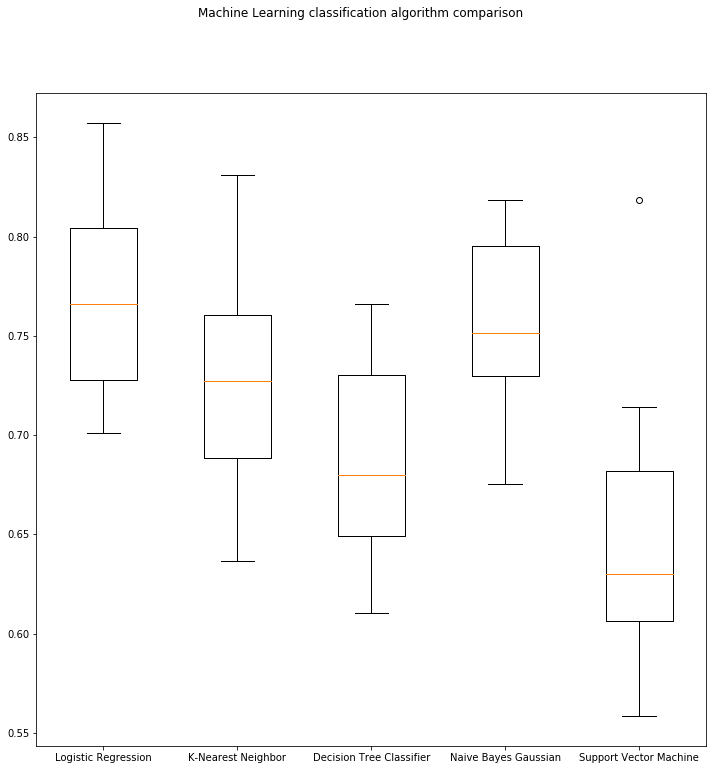

In [63]:
# boxplot algorithm comparison
fig = pyplot.figure(figsize = (12,12))
fig.suptitle('Machine Learning classification algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Logistic regression shows the highest accuracy compared to other classifiers.

I wonder what's up with SVM  !!!